# Unsupervised Learning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 1. Clusters

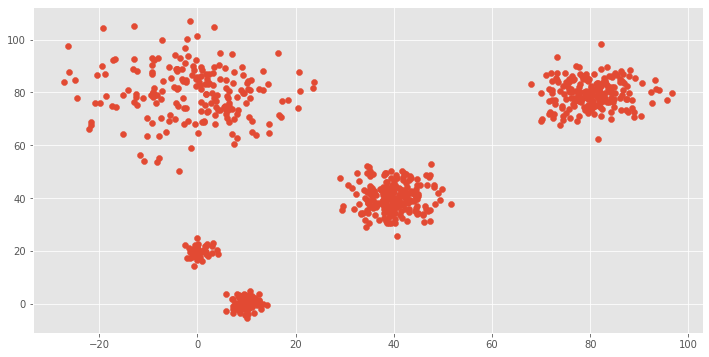

In [2]:
# Create Random Clusters
np.random.seed(1234)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,80],[[100,1],[1,100]], size=[200,])
X = np.concatenate((a,b,c,d,e),)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1])
plt.show();

### 2. Hierarchical Clustering

In [3]:
# Import Libraries
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

# Tuned Dendrogram
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Hierarchical Clustering: Truncated Dendrogram")
        plt.xlabel("Dataset Index (or Cluster Size)")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

#### 2.1 Single Linkage

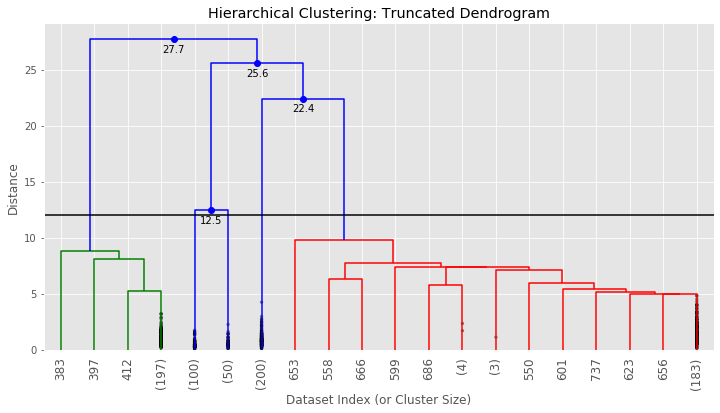

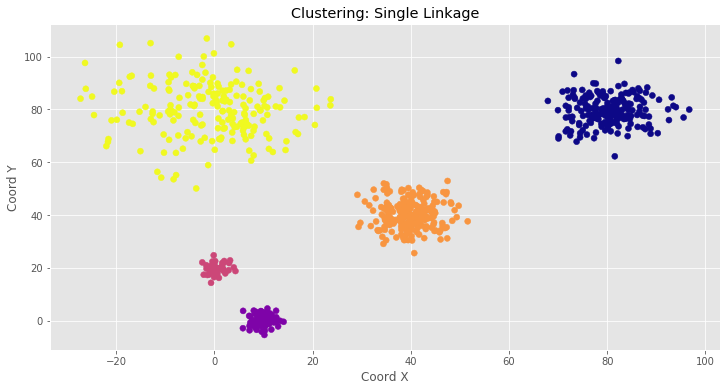

In [4]:
# Linkage Matrix
Z1 = linkage(X, "single")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z1,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=12)
plt.show();

#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z1, k, criterion="maxclust")
# Distance Criterion
#max_d=12
#clusters = fcluster(Z, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Single Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

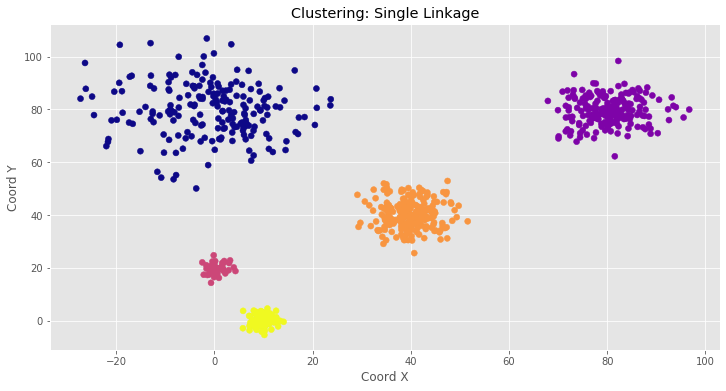

In [5]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='single',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Single Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.2 Average Linkage

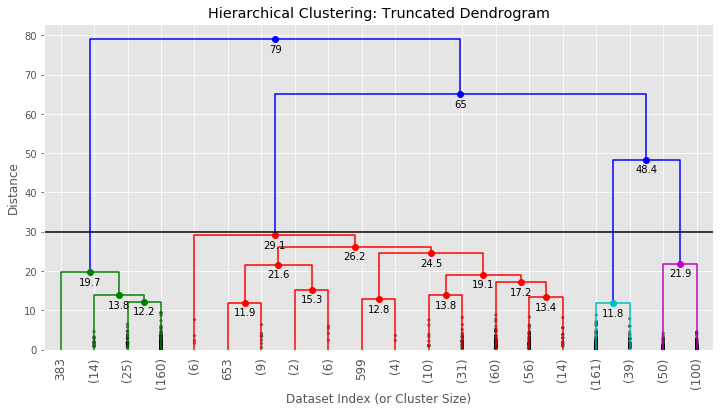

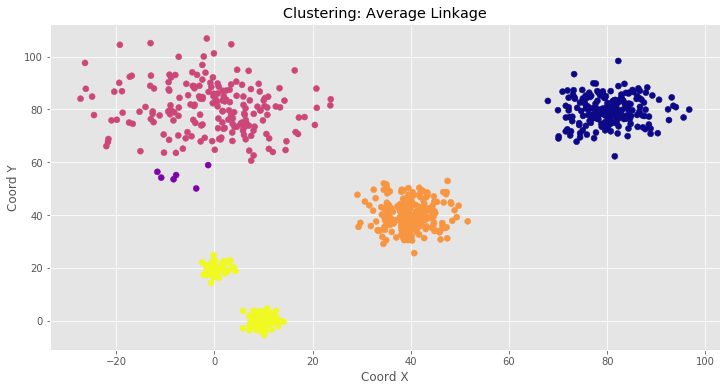

In [6]:
# Linkage Matrix
Z2 = linkage(X, "average")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z2,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=30)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z2, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z2, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Average Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

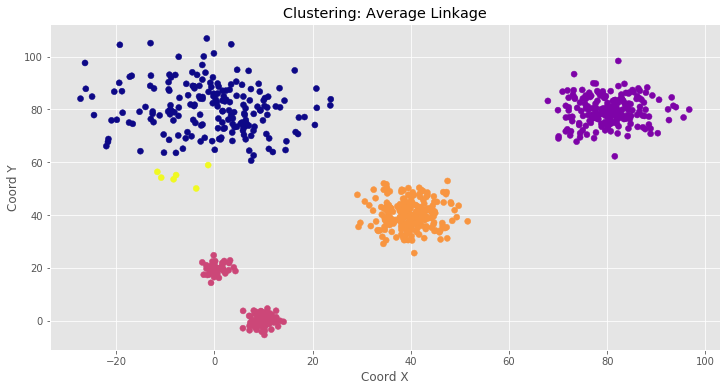

In [7]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='average',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Average Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.3 Complete Linkage

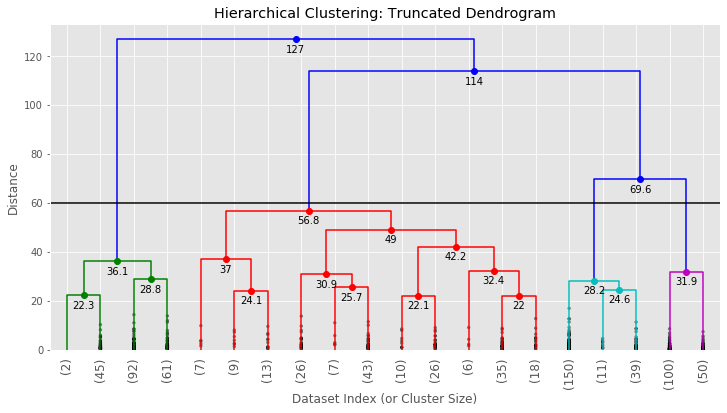

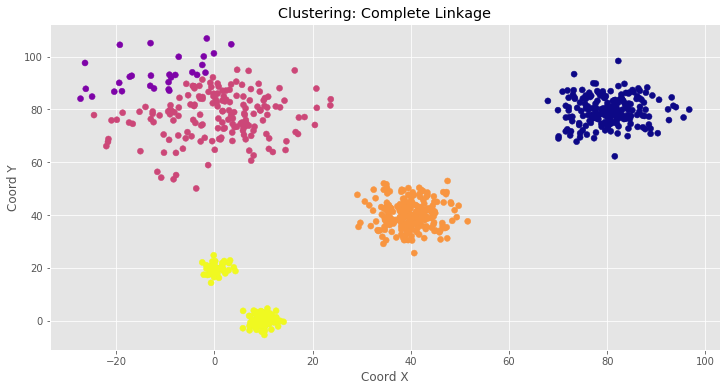

In [8]:
# Linkage Matrix
Z3 = linkage(X, "complete")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z3,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=60)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z3, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z3, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Complete Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

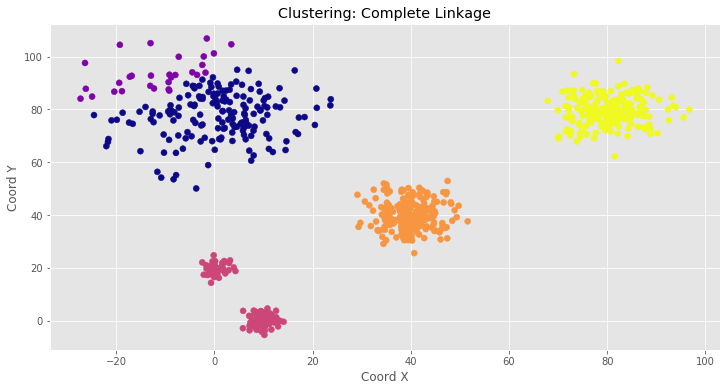

In [9]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='complete',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Complete Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.4 Centroid Linkage

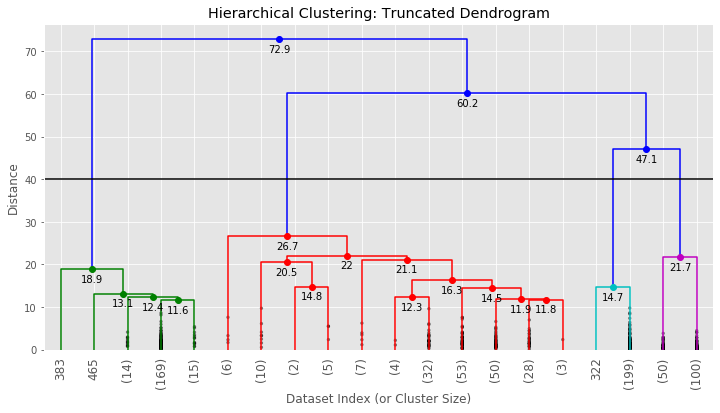

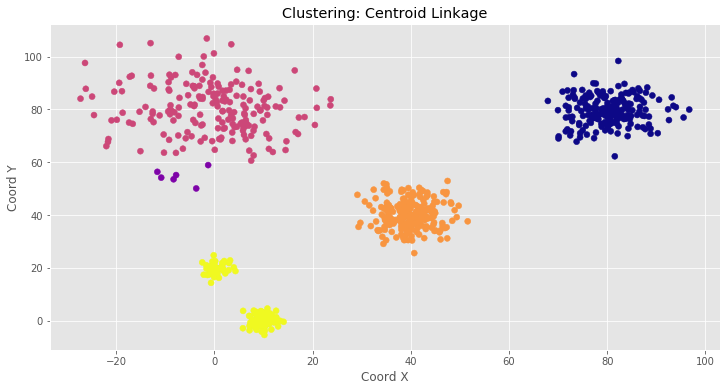

In [10]:
# Linkage Matrix
Z4 = linkage(X, "centroid")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z4,truncate_mode='lastp',p=20, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=40)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z4, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z4, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Centroid Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

#### 2.5 Ward Linkage

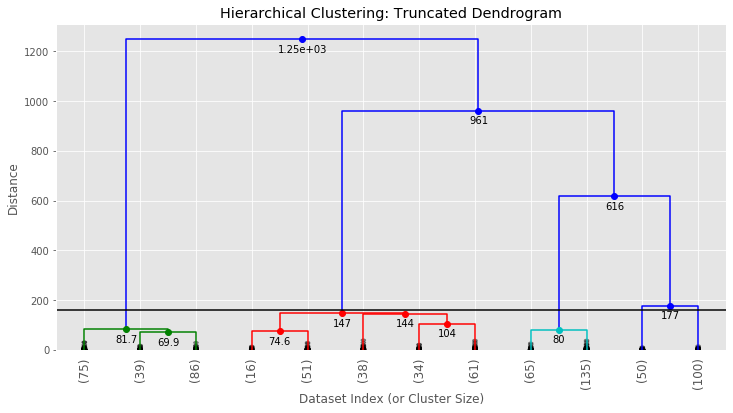

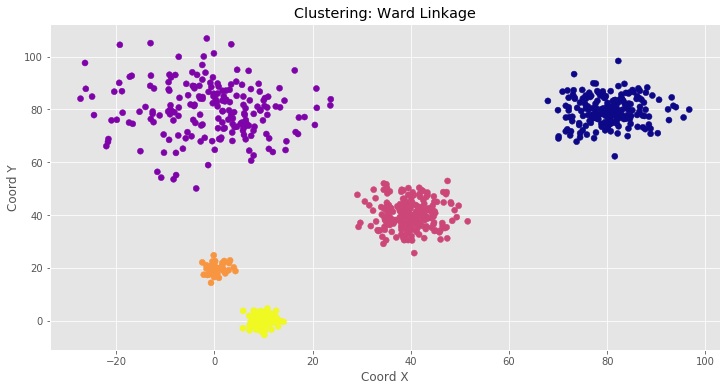

In [11]:
# Linkage Matrix
Z5 = linkage(X, "ward")
# Dendrogram
plt.figure(figsize=(12,6))
dendrogram_tune(Z5,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=160)
plt.show();
#######################################
#### How many clusters do we want? ####
#######################################
# Maximum number of Clusters
k=5
clusters = fcluster(Z5, k, criterion="maxclust")
# Distance Criterion
# max_d=30
# clusters = fcluster(Z5, max_d, criterion="distance")
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="plasma")
plt.title("Clustering: Ward Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

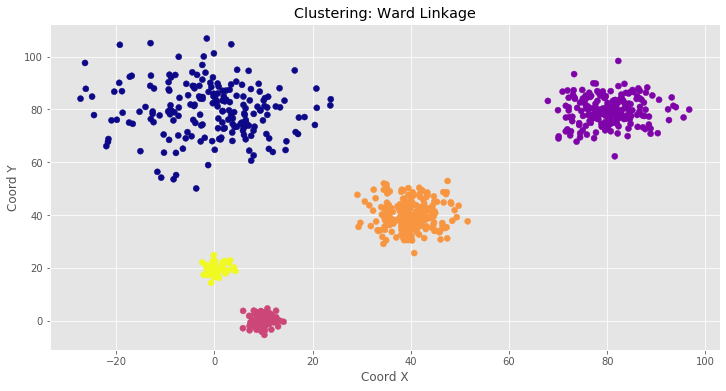

In [12]:
#######################################
####       Sklearn Method          ####
#######################################

from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=5,
                                     affinity='euclidean',
                                     memory=None,
                                     connectivity=None,
                                     compute_full_tree='auto',
                                     linkage='ward',
                                     pooling_func='deprecated',).fit(X)

clustering 


clustering.labels_
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_, cmap="plasma")
plt.title("Clustering: Ward Linkage")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

### 3. KMEANS

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

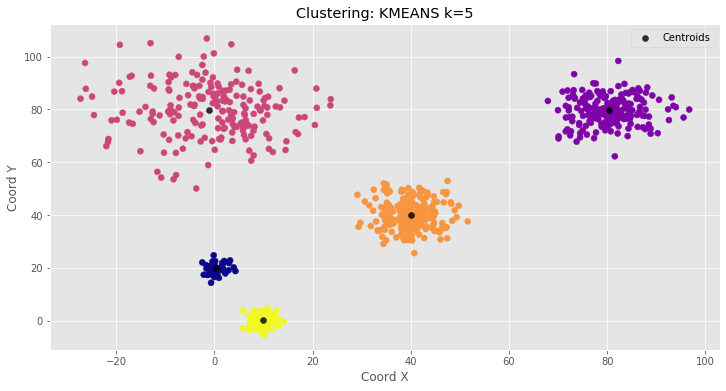

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = model.labels_, cmap="plasma")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',label='Centroids',alpha=0.8)
plt.title("Clustering: KMEANS k=5")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.legend()
plt.show();

In [15]:
model.cluster_centers_

array([[ 0.38913524, 19.85355183],
       [80.44989705, 79.62061351],
       [-1.06334231, 79.85727867],
       [39.97123476, 40.23171131],
       [ 9.95661772,  0.35292327]])

## 4. KMEANS: Elbow Method and Silhouette Method

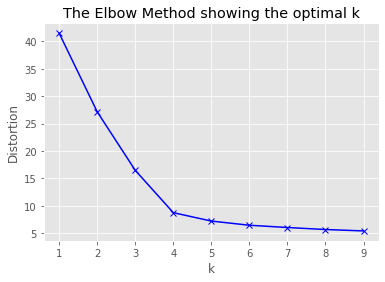

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

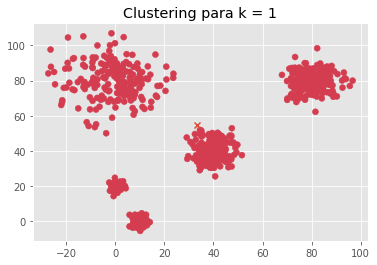

* Para k =  2  el promedio de la silueta es de:  0.5422835690458895
   - Para i =  1  la silueta del cluster vale :  0.8796125658447775
   - Para i =  2  la silueta del cluster vale :  0.4196184793008393


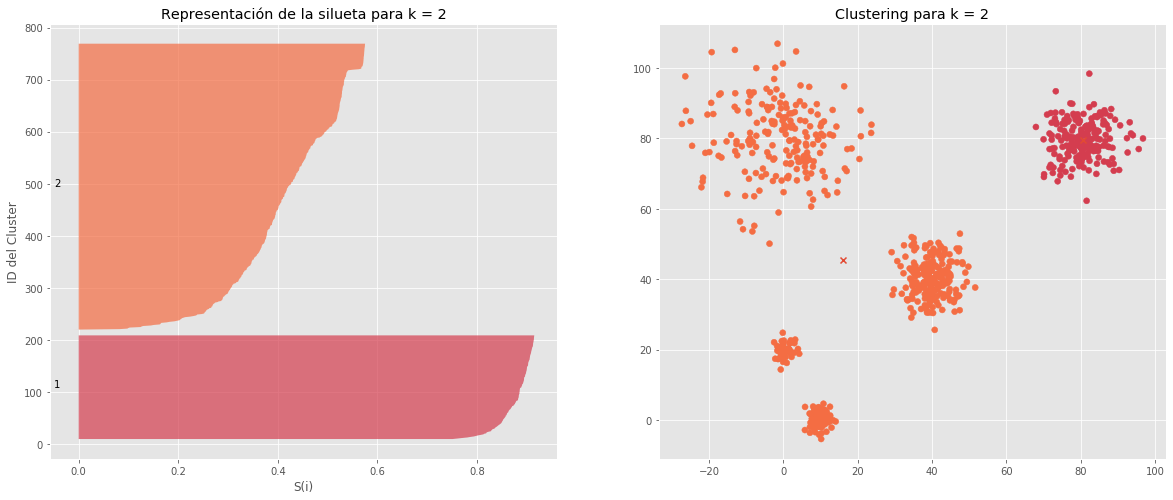

* Para k =  3  el promedio de la silueta es de:  0.6755338592431412
   - Para i =  1  la silueta del cluster vale :  0.5383667971641714
   - Para i =  2  la silueta del cluster vale :  0.7150254762387875
   - Para i =  3  la silueta del cluster vale :  0.8760846008856922


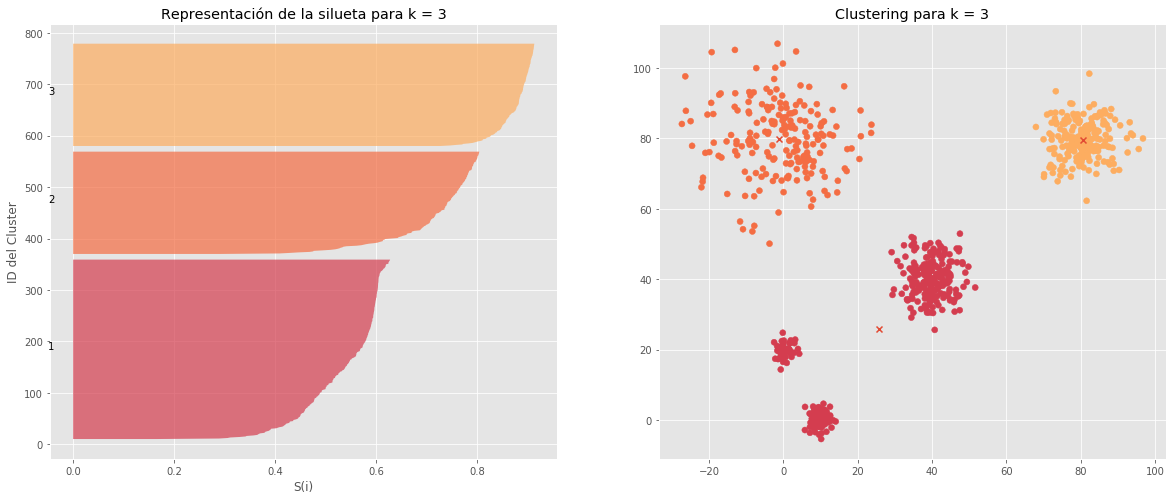

* Para k =  4  el promedio de la silueta es de:  0.772014750371805
   - Para i =  1  la silueta del cluster vale :  0.758045785231376
   - Para i =  2  la silueta del cluster vale :  0.8317012209388346
   - Para i =  3  la silueta del cluster vale :  0.6788261806561312
   - Para i =  4  la silueta del cluster vale :  0.8159935733757713


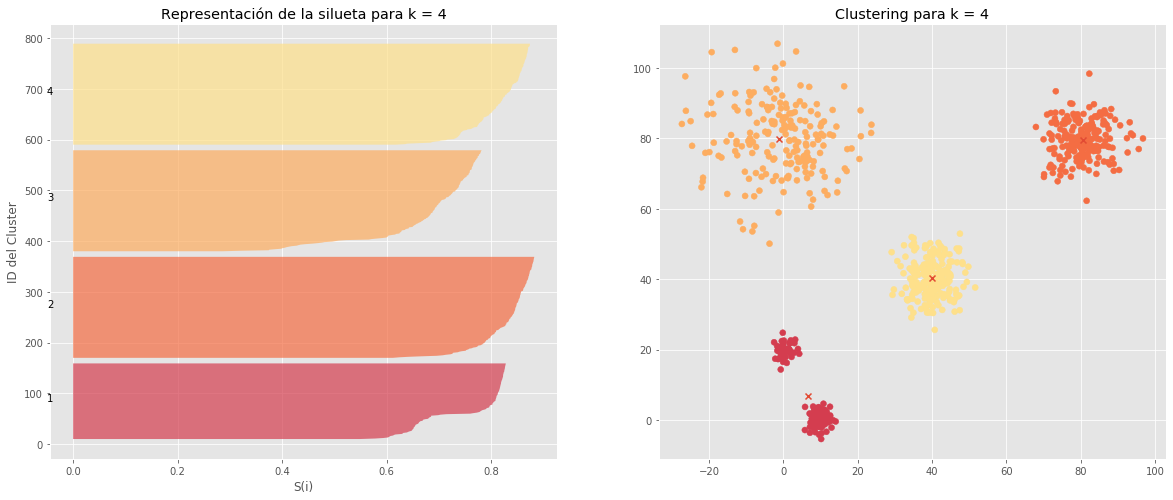

* Para k =  5  el promedio de la silueta es de:  0.784484415498173
   - Para i =  1  la silueta del cluster vale :  0.6633050569693091
   - Para i =  2  la silueta del cluster vale :  0.8045184965060773
   - Para i =  3  la silueta del cluster vale :  0.8317012209388346
   - Para i =  4  la silueta del cluster vale :  0.8551342022263347
   - Para i =  5  la silueta del cluster vale :  0.858898730363041


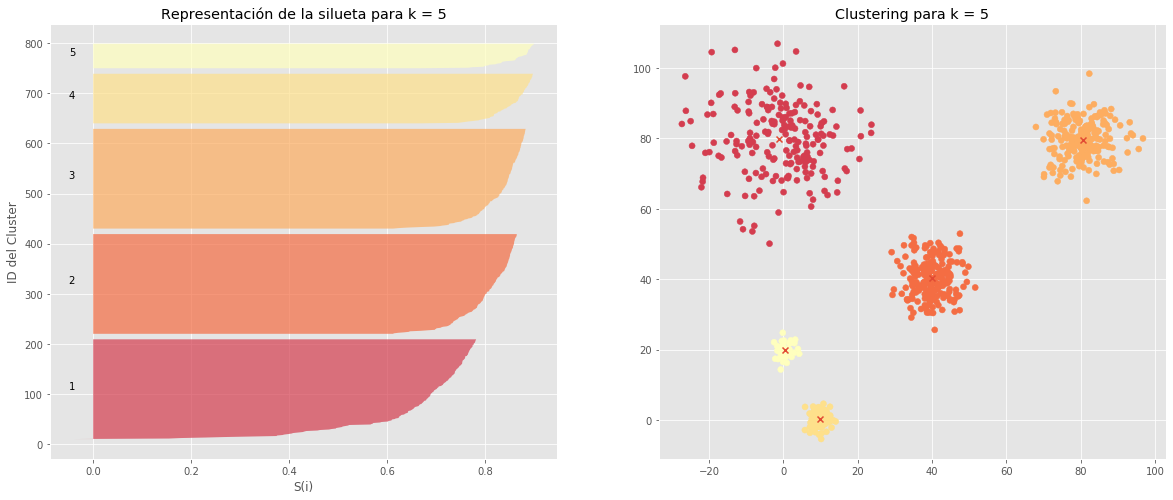

* Para k =  6  el promedio de la silueta es de:  0.6976584940579684
   - Para i =  1  la silueta del cluster vale :  0.8551342022263347
   - Para i =  2  la silueta del cluster vale :  0.3455743533388037
   - Para i =  3  la silueta del cluster vale :  0.8317012209388346
   - Para i =  4  la silueta del cluster vale :  0.8015341271492709
   - Para i =  5  la silueta del cluster vale :  0.858898730363041
   - Para i =  6  la silueta del cluster vale :  0.3350751438475016


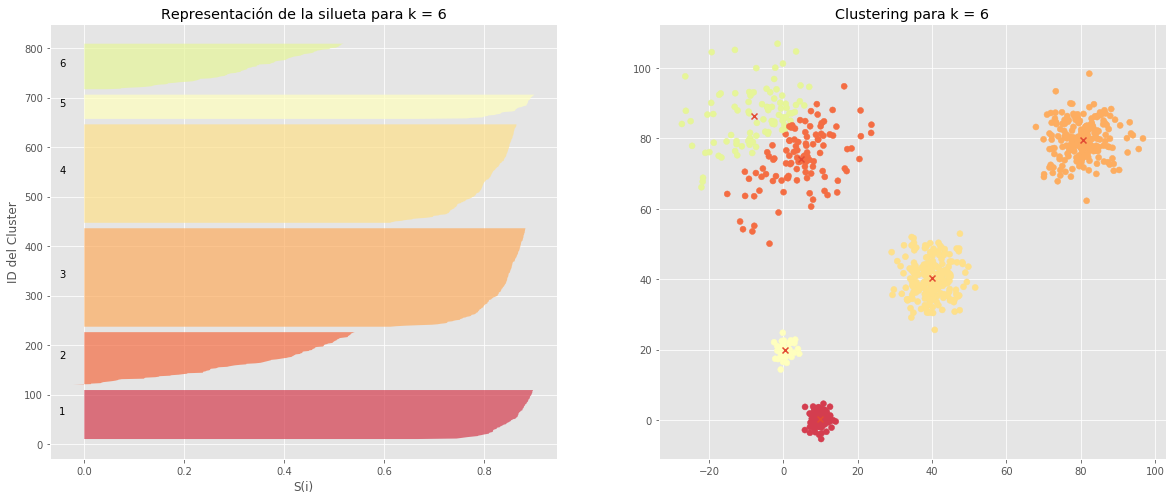

* Para k =  7  el promedio de la silueta es de:  0.6971562414044649
   - Para i =  1  la silueta del cluster vale :  0.800163825956767
   - Para i =  2  la silueta del cluster vale :  0.8317012209388346
   - Para i =  3  la silueta del cluster vale :  0.3963718923209231
   - Para i =  4  la silueta del cluster vale :  0.8551342022263347
   - Para i =  5  la silueta del cluster vale :  0.2975692471595983
   - Para i =  6  la silueta del cluster vale :  0.858898730363041
   - Para i =  7  la silueta del cluster vale :  0.33325325472027467


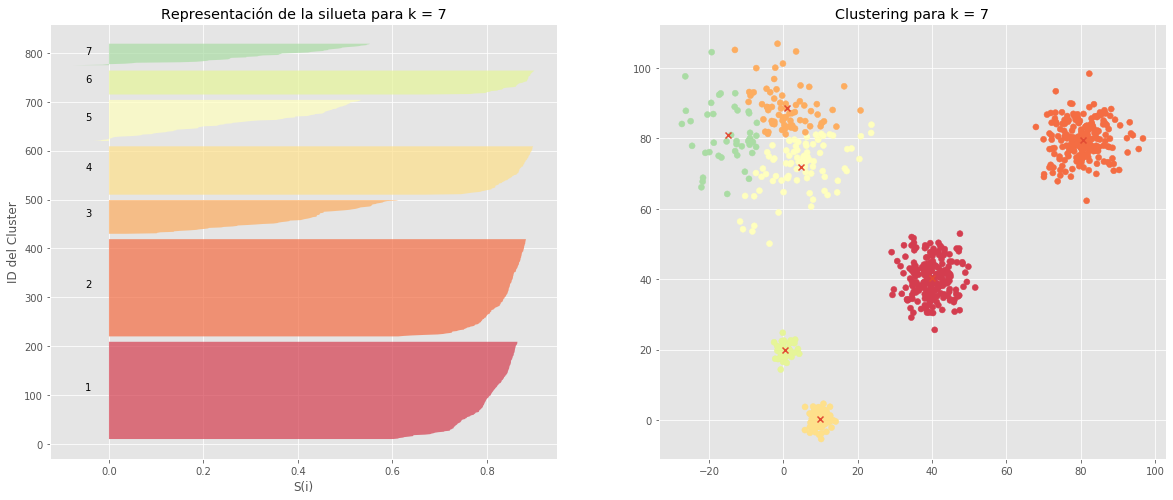

* Para k =  8  el promedio de la silueta es de:  0.696464132952225
   - Para i =  1  la silueta del cluster vale :  0.8317012209388346
   - Para i =  2  la silueta del cluster vale :  0.7984044535025968
   - Para i =  3  la silueta del cluster vale :  0.399732491986638
   - Para i =  4  la silueta del cluster vale :  0.8551342022263347
   - Para i =  5  la silueta del cluster vale :  0.347288486737276
   - Para i =  6  la silueta del cluster vale :  0.2563787769443215
   - Para i =  7  la silueta del cluster vale :  0.858898730363041
   - Para i =  8  la silueta del cluster vale :  0.3176910104141791


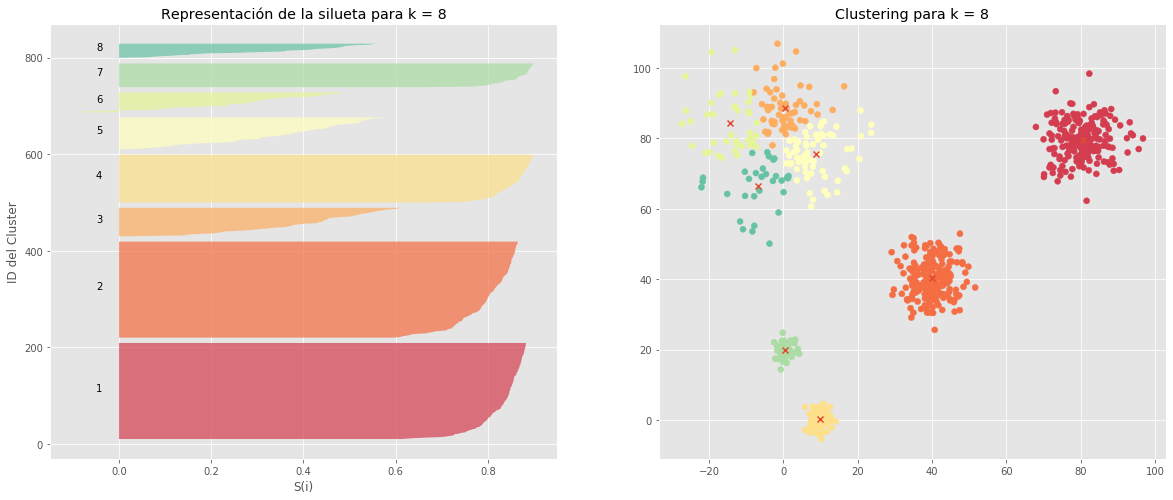

* Para k =  9  el promedio de la silueta es de:  0.5751140552916617
   - Para i =  1  la silueta del cluster vale :  0.8215868128008925
   - Para i =  2  la silueta del cluster vale :  0.36617794429835177
   - Para i =  3  la silueta del cluster vale :  0.399732491986638
   - Para i =  4  la silueta del cluster vale :  0.8551342022263347
   - Para i =  5  la silueta del cluster vale :  0.34073419652850245
   - Para i =  6  la silueta del cluster vale :  0.347288486737276
   - Para i =  7  la silueta del cluster vale :  0.3176910104141791
   - Para i =  8  la silueta del cluster vale :  0.2563787769443215
   - Para i =  9  la silueta del cluster vale :  0.858898730363041


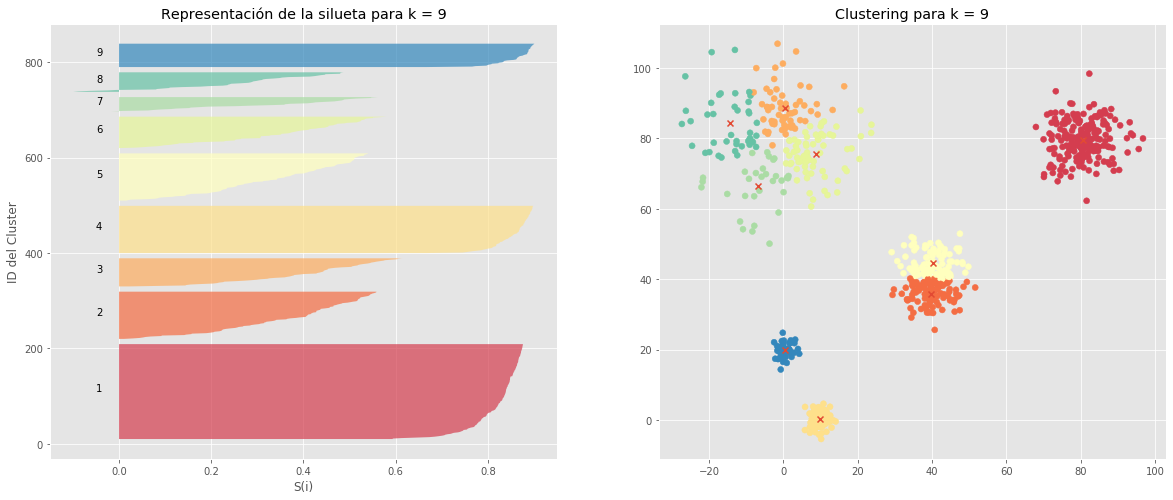

In [17]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.spatial.distance import cdist

max_k = 10 # Máximo número de iteraciones llevadas a cabo
K = range(1,max_k)
ssw = [] # Suma de los cuadrados internos
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X,centroid,'euclidean'),axis=1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)) # Suma Distancias al baricentro
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    # Fabricaremos silueta para cada cluster (No hacmeos silueta si k=1)
    if 1<k<len(X):
        # Crear subplot 1 fila 2 columnas
        fig,(axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        # 1º Subplot: Contendra silueta de -1 a 1
        # En nuestro caso ya controlamos que los valores están entre -0.1 y 1
        #axis1.set_xlim([-0.1,1.0])
        # Número de clusters a insertar, determinará el tamaño de cada barra
        #axis1.set_ylim([0,len(X)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(X,labels)
        print('* Para k = ',k,' el promedio de la silueta es de: ',silhouette_avg)
        sample_silhouette_values = silhouette_samples(X,labels)
        
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print('   - Para i = ',i+1,' la silueta del cluster vale : ',np.mean(ith_cluster_sv))
            # Ordenamos descendente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            # Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # Elegimos color del cluster
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                               0,ith_cluster_sv,facecolor= color, alpha=0.7)
            
            # Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            # Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 # dejamos vacías 10 posiciones sin muestra
        
        axis1.set_title('Representación de la silueta para k = %s'%str(k))
        axis1.set_xlabel('S(i)')
        axis1.set_ylabel('ID del Cluster')
        
        # Fin de representación de silueta
        
    ## Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.title('Clustering para k = %s'%str(k))
    plt.scatter(X[:,0],X[:,1],c=label_color)
    plt.scatter(centers[0],centers[1], marker='x')
    plt.show()

## 5. DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=11,min_samples=5)
model_dbs = dbs.fit(X)

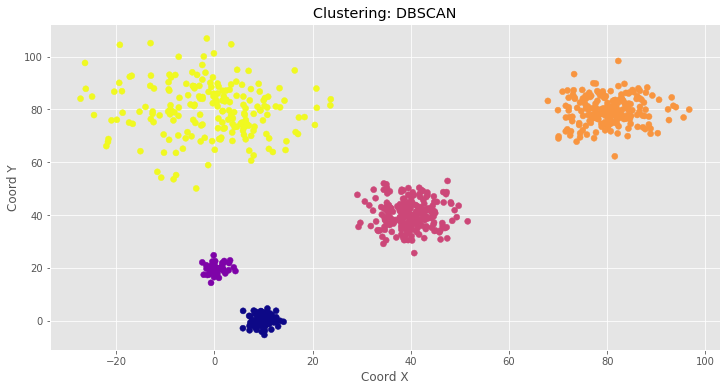

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = model_dbs.labels_, cmap="plasma")
plt.title("Clustering: DBSCAN")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

## 6. DBSCAN: Set EPS and MinPts

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### 6.1 Set MinPts

- Set MinPts Manually. Ex: 5

### 6.2 Select EPS based on K-Distances Plot

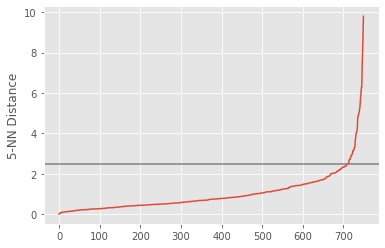

In [21]:
# Calcula la distancia media de cada punto a su k-Neighbor más cercano (k=MinPts)
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
# Ordena por distancias ascendentes
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# Plot
plt.plot(distances)
plt.axhline(2.5, color="gray")
plt.ylabel('5-NN Distance');

### 6.3 Model

In [22]:
m = DBSCAN(eps=2.5, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=2.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [23]:
len(X)

750

In [24]:
np.log(len(X))

6.620073206530356

In [25]:
clusters = m.labels_

In [26]:
len(set(clusters))

8

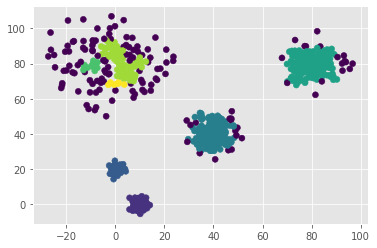

In [27]:
plt.scatter(X[:,0], X[:,1], c=clusters);

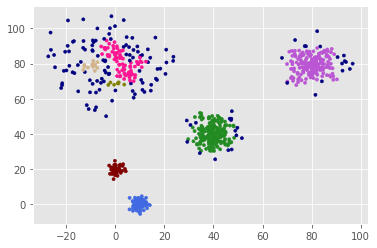

In [28]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters),s=10);

## 7. OPTICS

Ordering points to identify clustering structure:

- Density-based clustering
- Based on DBSCAN
- Solves dbscan problem with diverse density clusters:
    - by considering a eps by each core-point.
    - Assigning points to the same cluster if they are under a set density.

In [29]:
from sklearn.cluster import OPTICS

In [30]:
clustering = OPTICS(min_samples=27,metric='euclidean').fit(X)

In [31]:
clustering

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='euclidean', metric_params=None,
       min_cluster_size=None, min_samples=27, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [32]:
len(set(clustering.labels_))

5

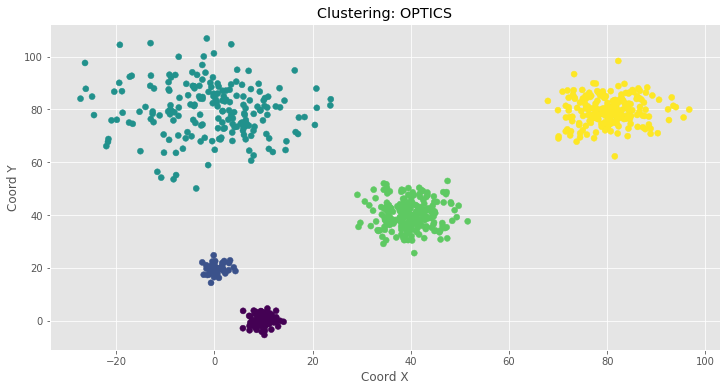

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = clustering.labels_)
plt.title("Clustering: OPTICS")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

## 8. HDBSCAN

In [102]:
import hdbscan

In [103]:
cluster = hdbscan.HDBSCAN()
cluster.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

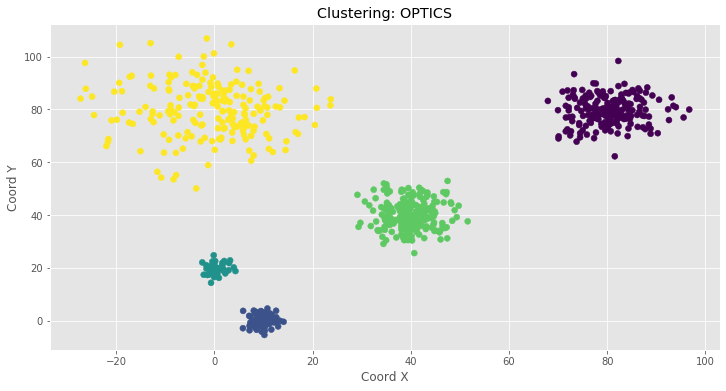

In [104]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c = cluster.labels_)
plt.title("Clustering: OPTICS")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();

__Another Example__

In [105]:
from sklearn.datasets import make_blobs

In [106]:
blobs, labels = make_blobs(n_samples=1000, n_features=20,centers=7,cluster_std=1,random_state=1,shuffle=False)

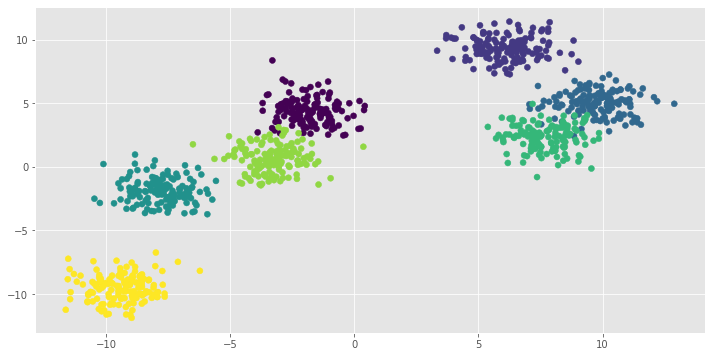

In [107]:
plt.figure(figsize=(12,6))
plt.scatter(blobs[:,0], blobs[:,1],c=labels)
plt.show();

In [108]:
cluster = hdbscan.HDBSCAN()
cluster.fit(blobs)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

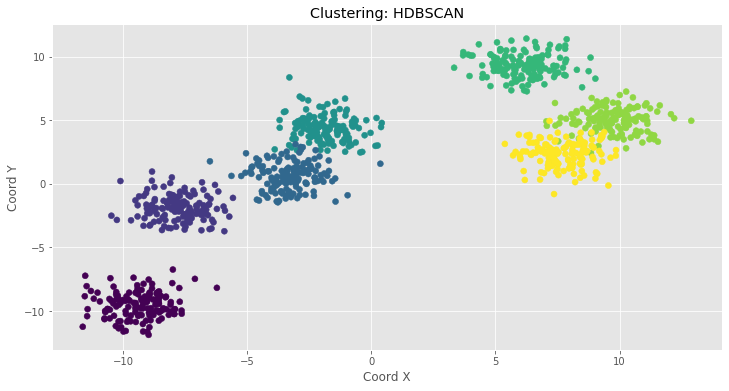

In [110]:
plt.figure(figsize=(12,6))
plt.scatter(blobs[:,0], blobs[:,1], c = cluster.labels_)
plt.title("Clustering: HDBSCAN")
plt.xlabel("Coord X")
plt.ylabel("Coord Y")
plt.show();